# SVM Algorithm - Salary Problem

## -------------------------------------------------------------------------------------------------------------------------

## Problem Statement : Prepare a classification model using SVM for salary data .

## 1. Import Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset :

In [2]:
salary_train_data = pd.read_csv('SalaryData_Train(1).csv',sep=',')
salary_test_data  = pd.read_csv('SalaryData_Test(1).csv', sep=',')

In [3]:
salary_train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## 3. Data Understanding :

### 3.1 Data Description:

* **age** -- age of a person
* **workclass**	-- A work class is a grouping of work 
* **education**	-- Education of an individuals	
* **maritalstatus** -- Marital status of an individulas	
* **occupation**	 -- occupation of an individuals
* **relationship** -- 	
* **race** --  Race of an Individual
* **sex** --  Gender of an Individual
* **capitalgain** --  profit received from the sale of an investment	
* **capitalloss**	-- A decrease in the value of a capital asset
* **hoursperweek** -- number of hours work per week	
* **native** -- Native of an individual
* **Salary** -- salary of an individual

### 3.2 Initial Analysis :

#### I. Salary_train_data :

In [5]:
salary_train_data.shape

(30161, 14)

In [6]:
salary_train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
salary_train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

#### II. Salary_test_data :

In [8]:
salary_test_data.shape

(15060, 14)

In [9]:
salary_test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
salary_test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

## 4. Data Preparation :

In [11]:
# Renaming train data columns :

salary_train_data.columns = ['age', 'work_class', 'education', 'education_no', 'marital_status',
                             'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                             'capital_loss', 'hours_per_week', 'native', 'salary']
salary_test_data.columns = ['age', 'work_class', 'education', 'education_no', 'marital_status',
                             'occupation', 'relationship', 'race', 'sex', 'capital_gain',
                             'capital_loss', 'hours_per_week', 'native', 'salary']

In [12]:
salary_train_data.head()

,age,work_class,education,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
salary_test_data.head()

,age,work_class,education,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native,salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## 5. Data Pre-Processing :

In [14]:
salary_train_data_copy = salary_train_data.copy()
salary_test_data_copy  = salary_test_data.copy()

#### I. Train data conversion :

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le_train = LabelEncoder()
salary_train_data_copy['work_class'] = le_train.fit_transform(salary_train_data['work_class'])
salary_train_data_copy['education']  = le_train.fit_transform(salary_train_data['education'])
salary_train_data_copy['marital_status'] = le_train.fit_transform(salary_train_data['marital_status'])
salary_train_data_copy['occupation']  = le_train.fit_transform(salary_train_data['occupation'])
salary_train_data_copy['relationship'] = le_train.fit_transform(salary_train_data['relationship'])
salary_train_data_copy['race']  = le_train.fit_transform(salary_train_data['race'])
salary_train_data_copy['sex'] = le_train.fit_transform(salary_train_data['sex'])
salary_train_data_copy['native'] = le_train.fit_transform(salary_train_data['native'])
salary_train_data_copy['salary'] = le_train.fit_transform(salary_train_data['salary'])

#### II. Test data conversion :

In [17]:
le_test = LabelEncoder()
salary_test_data_copy['work_class'] = le_test.fit_transform(salary_test_data['work_class'])
salary_test_data_copy['education']  = le_test.fit_transform(salary_test_data['education'])
salary_test_data_copy['marital_status'] = le_test.fit_transform(salary_test_data['marital_status'])
salary_test_data_copy['occupation']  = le_test.fit_transform(salary_test_data['occupation'])
salary_test_data_copy['relationship'] = le_test.fit_transform(salary_test_data['relationship'])
salary_test_data_copy['race']  = le_test.fit_transform(salary_test_data['race'])
salary_test_data_copy['sex'] = le_test.fit_transform(salary_test_data['sex'])
salary_test_data_copy['native'] = le_test.fit_transform(salary_test_data['native'])
salary_test_data_copy['salary'] = le_test.fit_transform(salary_test_data['salary'])

In [18]:
salary_train_data_copy.head()

,age,work_class,education,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native,salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [19]:
salary_test_data_copy.head()

,age,work_class,education,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native,salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


### 5.2 Datatypes check after transfromation

##### I. Train data :

In [20]:
salary_train_data_copy.dtypes

age               int64
work_class        int32
education         int32
education_no      int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native            int32
salary            int32
dtype: object

#### II. Test data :

In [21]:
salary_test_data_copy.dtypes

age               int64
work_class        int32
education         int32
education_no      int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native            int32
salary            int32
dtype: object

## 6. Model Building :

#### I. Train data 

In [22]:
X_train= salary_train_data_copy.drop(labels= 'salary',axis = 1)
y_train = salary_train_data_copy[['salary']]

#### II. Test data

In [23]:
X_test = salary_test_data_copy.drop(labels= 'salary',axis = 1)
y_test = salary_test_data_copy[['salary']]

### Visualisation :

#### Train data and Test data :

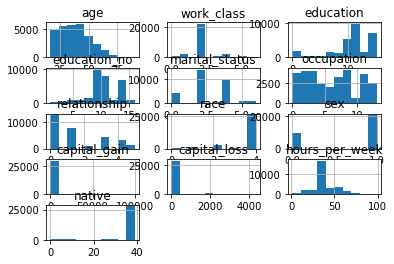

In [29]:
X_train.hist(layout= (5,3))
plt.show()

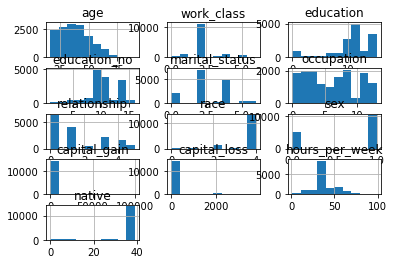

In [30]:
X_test.hist(layout= (5,3))
plt.show()

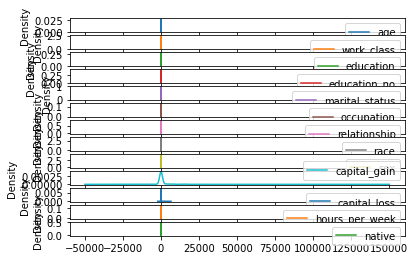

In [32]:
X_train.plot(kind='density', subplots=True, layout=(13,1))
plt.show()

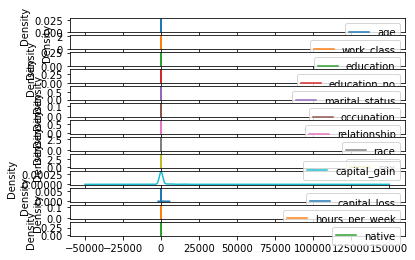

In [34]:
X_test.plot(kind='density', subplots=True, layout=(13,1))
plt.show()

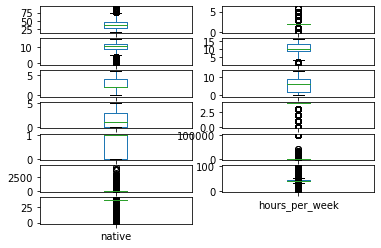

In [35]:
X_train.plot(kind='box', subplots=True, layout=(7,2))
plt.show()

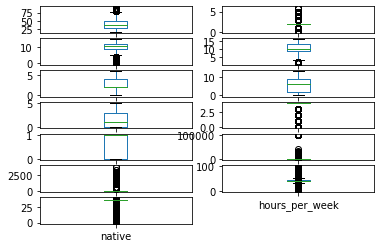

In [36]:
X_test.plot(kind='box', subplots=True, layout=(7,2))
plt.show()

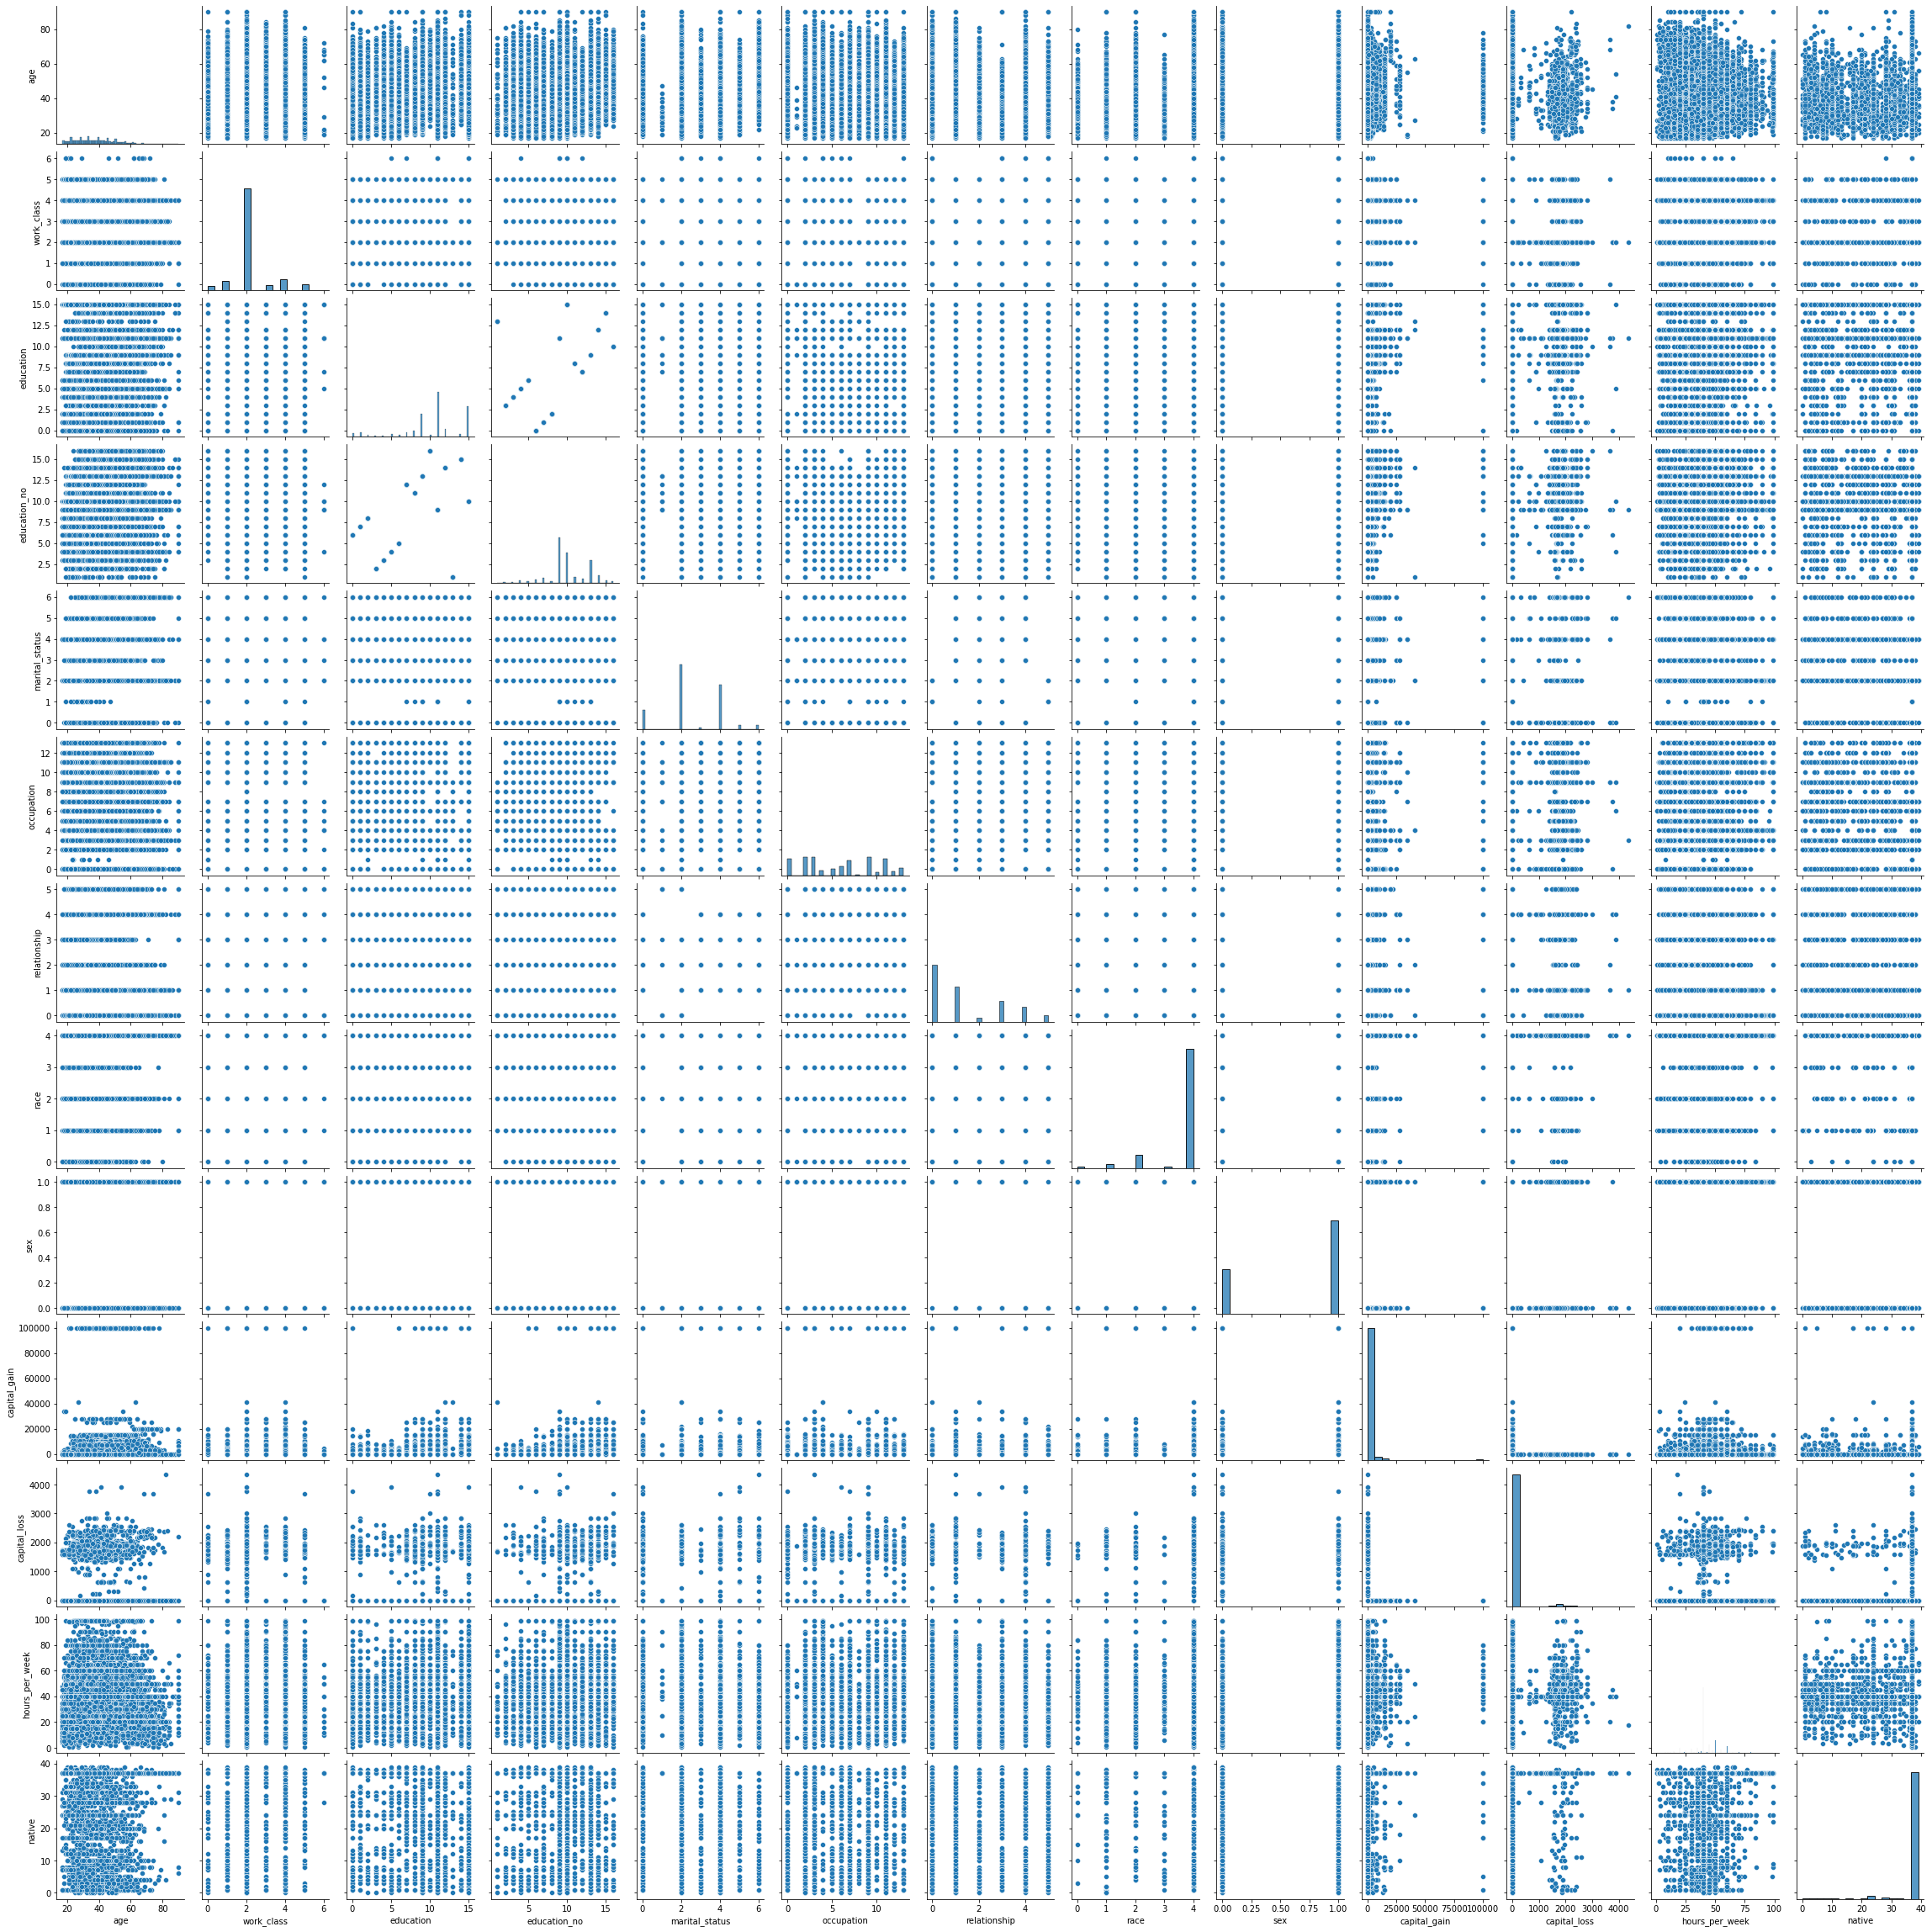

In [37]:
sns.pairplot(X_train)

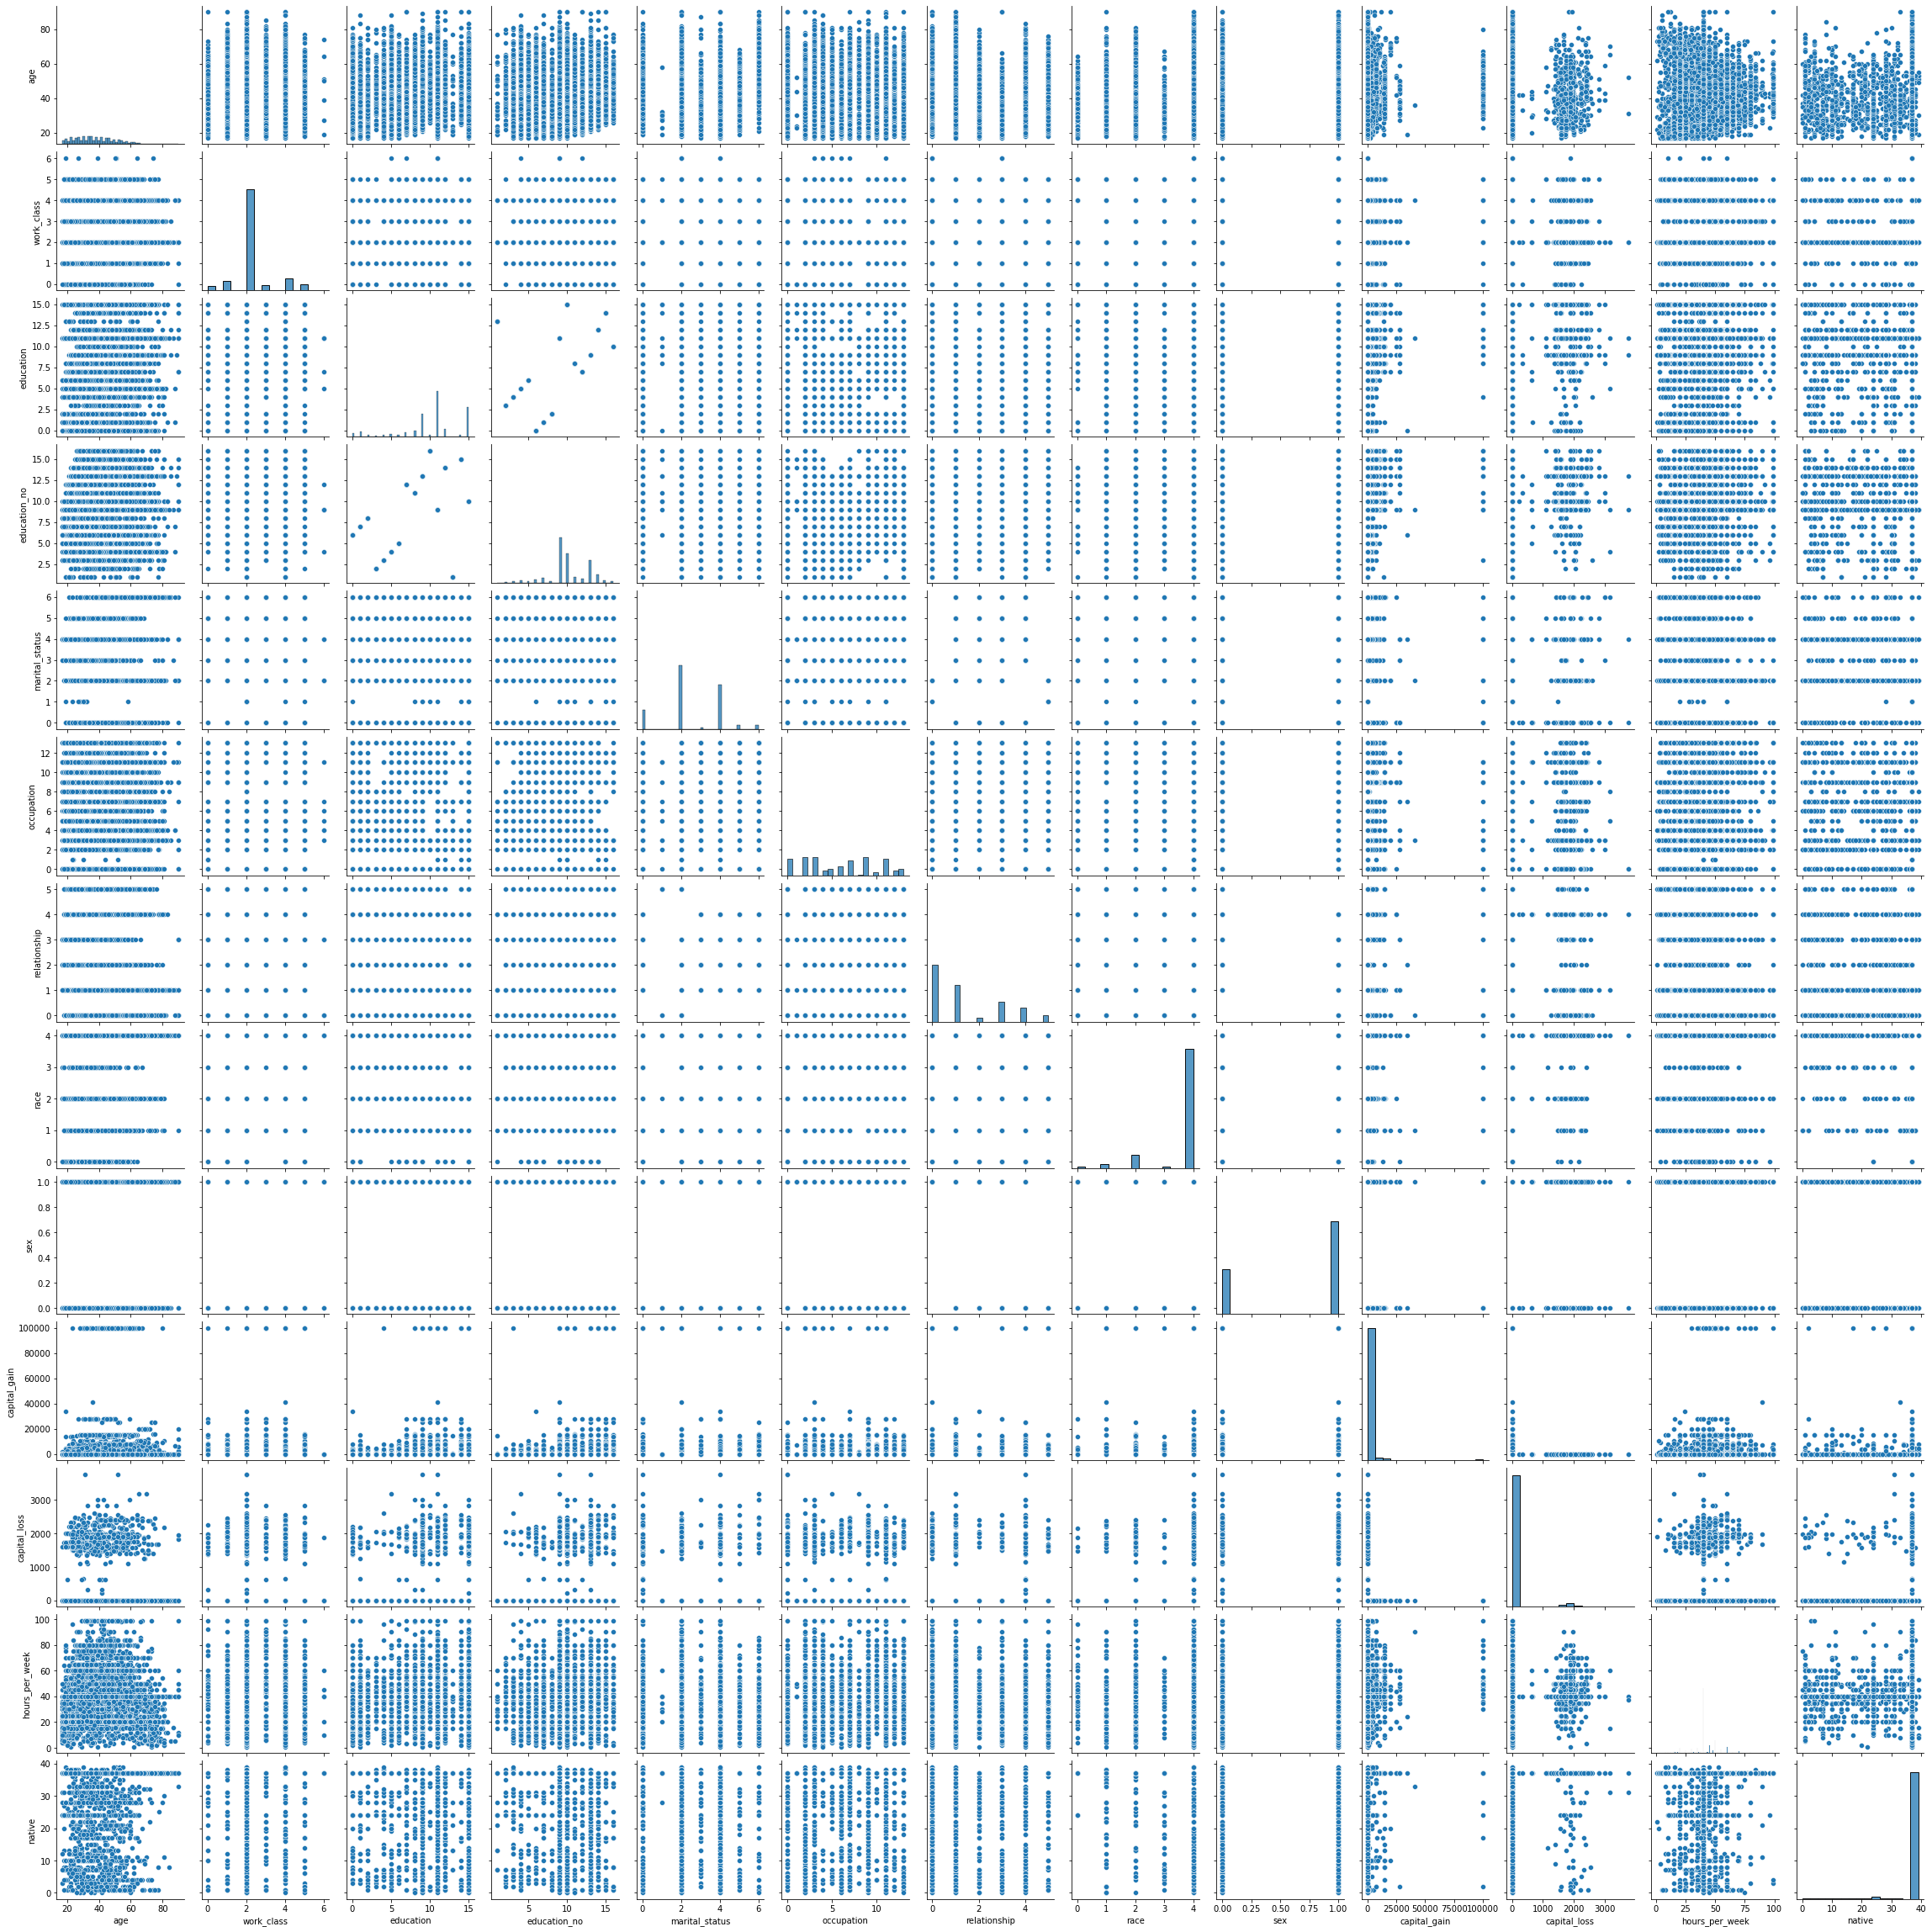

In [38]:
sns.pairplot(X_test)

## 7. Model Training | Testing | Evaluation :

In [39]:
X_train_1 = X_train.sample(n = 100, random_state= 12)
X_test_1  = X_test.sample(n = 50, random_state= 12)
y_train_1 = y_train.sample(n = 100, random_state= 12)
y_test_1  = y_test.sample(n = 50, random_state= 12)

In [40]:
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

#### I. Linear

In [41]:
svm_classifier_1 = svm.SVC(kernel= 'linear')
svm_classifier_1.fit(X_train_1,y_train_1)

y_predict_train_1 = svm_classifier_1.predict(X_train_1)
y_predict_test_1 = svm_classifier_1.predict(X_test_1)

print('TRAIN MODEL - 1')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train_1,y_predict_train_1),4))
print('Train Precision Score :',round(precision_score(y_train_1,y_predict_train_1)))
print('Train Recall Score   :',round(recall_score(y_train_1,y_predict_train_1),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train_1,y_predict_train_1))

print('TEST MODEL - 1')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test_1,y_predict_test_1),4))
print('Test Precision Score :',round(precision_score(y_test_1,y_predict_test_1)))
print('Test Recall Score    :',round(recall_score(y_test_1,y_predict_test_1),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test_1,y_predict_test_1))

TRAIN MODEL - 1
------------------------------------------------------------------------
Train Accuracy Score : 0.87
Train Precision Score : 1
Train Recall Score   : 0.5909
Train Confusion Matrix :
 [[74  4]
 [ 9 13]]
TEST MODEL - 1
------------------------------------------------------------------------
Test Accuracy Score  : 0.78
Test Precision Score : 1
Test Recall Score    : 0.2308
Test Confusion Matrix :
 [[36  1]
 [10  3]]


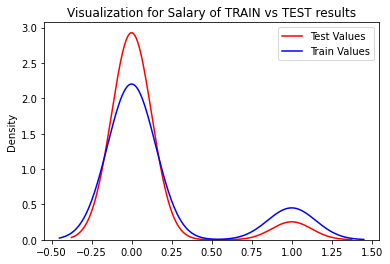

In [53]:
ax = sns.distplot(y_predict_test_1, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_1, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Salary of TRAIN vs TEST results')
plt.legend()
plt.show()

#### II. RBF

In [42]:
svm_classifier_2 = svm.SVC(kernel= 'rbf')
svm_classifier_2.fit(X_train_1,y_train_1)

y_predict_train_2 = svm_classifier_2.predict(X_train_1)
y_predict_test_2 = svm_classifier_2.predict(X_test_1)

print('TRAIN MODEL - 2')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train_1,y_predict_train_2),4))
print('Train Precision Score :',round(precision_score(y_train_1,y_predict_train_2)))
print('Train Recall Score   :',round(recall_score(y_train_1,y_predict_train_2),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train_1,y_predict_train_2))

print('TEST MODEL - 2')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test_1,y_predict_test_2),4))
print('Test Precision Score :',round(precision_score(y_test_1,y_predict_test_2)))
print('Test Recall Score    :',round(recall_score(y_test_1,y_predict_test_2),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test_1,y_predict_test_2))

TRAIN MODEL - 2
------------------------------------------------------------------------
Train Accuracy Score : 0.79
Train Precision Score : 1
Train Recall Score   : 0.1818
Train Confusion Matrix :
 [[75  3]
 [18  4]]
TEST MODEL - 2
------------------------------------------------------------------------
Test Accuracy Score  : 0.8
Test Precision Score : 1
Test Recall Score    : 0.2308
Test Confusion Matrix :
 [[37  0]
 [10  3]]


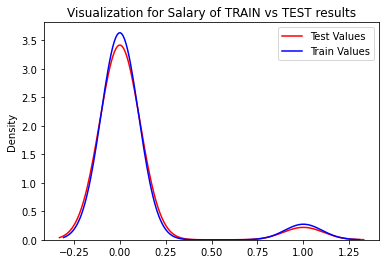

In [54]:
ax = sns.distplot(y_predict_test_2, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_2, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Salary of TRAIN vs TEST results')
plt.legend()
plt.show()

#### III. Poly

In [43]:
svm_classifier_3 = svm.SVC(kernel= 'poly')
svm_classifier_3.fit(X_train_1,y_train_1)

y_predict_train_3 = svm_classifier_3.predict(X_train_1)
y_predict_test_3 = svm_classifier_3.predict(X_test_1)

print('TRAIN MODEL - 3')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train_1,y_predict_train_3),4))
print('Train Precision Score :',round(precision_score(y_train_1,y_predict_train_3)))
print('Train Recall Score   :',round(recall_score(y_train_1,y_predict_train_3),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train_1,y_predict_train_3))

print('TEST MODEL - 3')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test_1,y_predict_test_3),4))
print('Test Precision Score :',round(precision_score(y_test_1,y_predict_test_3)))
print('Test Recall Score    :',round(recall_score(y_test_1,y_predict_test_3),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test_1,y_predict_test_3))

TRAIN MODEL - 3
------------------------------------------------------------------------
Train Accuracy Score : 0.8
Train Precision Score : 1
Train Recall Score   : 0.1818
Train Confusion Matrix :
 [[76  2]
 [18  4]]
TEST MODEL - 3
------------------------------------------------------------------------
Test Accuracy Score  : 0.78
Test Precision Score : 1
Test Recall Score    : 0.1538
Test Confusion Matrix :
 [[37  0]
 [11  2]]


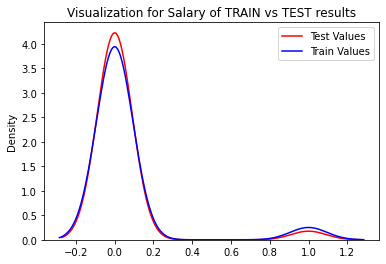

In [55]:
ax = sns.distplot(y_predict_test_3, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_3, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Salary of TRAIN vs TEST results')
plt.legend()
plt.show()

### Increase the sample sizes

In [44]:
X_train_2 = X_train.sample(n = 1000, random_state= 12)
X_test_2  = X_test.sample(n = 600, random_state= 12)
y_train_2 = y_train.sample(n = 1000, random_state= 12)
y_test_2  = y_test.sample(n = 600, random_state= 12)

In [45]:
svm_classifier_4 = svm.SVC(kernel= 'linear',C=2.0,degree=3,gamma='scale')
svm_classifier_4.fit(X_train_2,y_train_2)

y_predict_train_4 = svm_classifier_4.predict(X_train_2)
y_predict_test_4 = svm_classifier_4.predict(X_test_2)

print('TRAIN MODEL - 4')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train_2,y_predict_train_4),4))
print('Train Precision Score :',round(precision_score(y_train_2,y_predict_train_4)))
print('Train Recall Score   :',round(recall_score(y_train_2,y_predict_train_4),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train_2,y_predict_train_4))

print('TEST MODEL - 4')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test_2,y_predict_test_4),4))
print('Test Precision Score :',round(precision_score(y_test_2,y_predict_test_4)))
print('Test Recall Score    :',round(recall_score(y_test_2,y_predict_test_4),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test_2,y_predict_test_4))

TRAIN MODEL - 4
------------------------------------------------------------------------
Train Accuracy Score : 0.817
Train Precision Score : 1
Train Recall Score   : 0.4469
Train Confusion Matrix :
 [[716  58]
 [125 101]]
TEST MODEL - 4
------------------------------------------------------------------------
Test Accuracy Score  : 0.7817
Test Precision Score : 1
Test Recall Score    : 0.4161
Test Confusion Matrix :
 [[407  44]
 [ 87  62]]


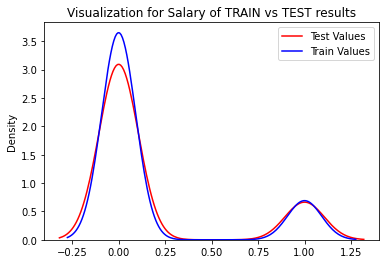

In [56]:
ax = sns.distplot(y_predict_test_4, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_4, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Salary of TRAIN vs TEST results')
plt.legend()
plt.show()

In [46]:
svm_classifier_5 = svm.SVC(kernel= 'rbf',C=2.0,degree=3,gamma='scale')
svm_classifier_5.fit(X_train_2,y_train_2)

y_predict_train_5 = svm_classifier_5.predict(X_train_2)
y_predict_test_5 = svm_classifier_5.predict(X_test_2)

print('TRAIN MODEL - 5')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train_2,y_predict_train_5),4))
print('Train Precision Score :',round(precision_score(y_train_2,y_predict_train_5)))
print('Train Recall Score   :',round(recall_score(y_train_2,y_predict_train_5),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train_2,y_predict_train_5))

print('TEST MODEL - 5')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test_2,y_predict_test_5),4))
print('Test Precision Score :',round(precision_score(y_test_2,y_predict_test_5)))
print('Test Recall Score    :',round(recall_score(y_test_2,y_predict_test_5),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test_2,y_predict_test_5))

TRAIN MODEL - 5
------------------------------------------------------------------------
Train Accuracy Score : 0.812
Train Precision Score : 1
Train Recall Score   : 0.2478
Train Confusion Matrix :
 [[756  18]
 [170  56]]
TEST MODEL - 5
------------------------------------------------------------------------
Test Accuracy Score  : 0.7967
Test Precision Score : 1
Test Recall Score    : 0.2685
Test Confusion Matrix :
 [[438  13]
 [109  40]]


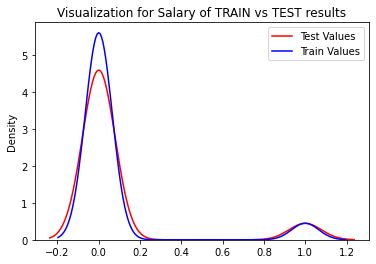

In [57]:
ax = sns.distplot(y_predict_test_5, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_5, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Salary of TRAIN vs TEST results')
plt.legend()
plt.show()

In [47]:
svm_classifier_6 = svm.SVC(kernel= 'poly',C=2.0,degree=3,gamma='scale')
svm_classifier_6.fit(X_train_2,y_train_2)

y_predict_train_6 = svm_classifier_6.predict(X_train_2)
y_predict_test_6 = svm_classifier_6.predict(X_test_2)

print('TRAIN MODEL - 6')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train_2,y_predict_train_6),4))
print('Train Precision Score :',round(precision_score(y_train_2,y_predict_train_6)))
print('Train Recall Score   :',round(recall_score(y_train_2,y_predict_train_6),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train_2,y_predict_train_6))

print('TEST MODEL - 6')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test_2,y_predict_test_6),4))
print('Test Precision Score :',round(precision_score(y_test_2,y_predict_test_6)))
print('Test Recall Score    :',round(recall_score(y_test_2,y_predict_test_6),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test_2,y_predict_test_6))

TRAIN MODEL - 6
------------------------------------------------------------------------
Train Accuracy Score : 0.78
Train Precision Score : 1
Train Recall Score   : 0.031
Train Confusion Matrix :
 [[773   1]
 [219   7]]
TEST MODEL - 6
------------------------------------------------------------------------
Test Accuracy Score  : 0.7633
Test Precision Score : 1
Test Recall Score    : 0.047
Test Confusion Matrix :
 [[451   0]
 [142   7]]


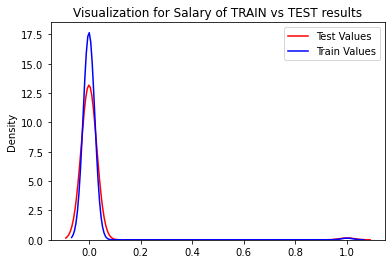

In [58]:
ax = sns.distplot(y_predict_test_6, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_6, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Salary of TRAIN vs TEST results')
plt.legend()
plt.show()

In [48]:
X_train_3 = X_train.sample(n = 500, random_state= 12)
X_test_3  = X_test.sample(n = 300, random_state= 12)
y_train_3 = y_train.sample(n = 500, random_state= 12)
y_test_3  = y_test.sample(n = 300, random_state= 12)

In [49]:
svm_classifier_7 = svm.SVC(kernel= 'linear',C=1.0,degree=3,gamma='scale',class_weight='balanced')
svm_classifier_7.fit(X_train_3,y_train_3)

y_predict_train_7 = svm_classifier_7.predict(X_train_3)
y_predict_test_7 = svm_classifier_7.predict(X_test_3)

print('TRAIN MODEL - 7')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train_3,y_predict_train_7),4))
print('Train Precision Score :',round(precision_score(y_train_3,y_predict_train_7)))
print('Train Recall Score   :',round(recall_score(y_train_3,y_predict_train_7),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train_3,y_predict_train_7))

print('TEST MODEL - 7')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test_3,y_predict_test_7),4))
print('Test Precision Score :',round(precision_score(y_test_3,y_predict_test_7)))
print('Test Recall Score    :',round(recall_score(y_test_3,y_predict_test_7),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test_3,y_predict_test_7))

TRAIN MODEL - 7
------------------------------------------------------------------------
Train Accuracy Score : 0.752
Train Precision Score : 0
Train Recall Score   : 0.8125
Train Confusion Matrix :
 [[285 103]
 [ 21  91]]
TEST MODEL - 7
------------------------------------------------------------------------
Test Accuracy Score  : 0.7133
Test Precision Score : 0
Test Recall Score    : 0.75
Test Confusion Matrix :
 [[163  69]
 [ 17  51]]


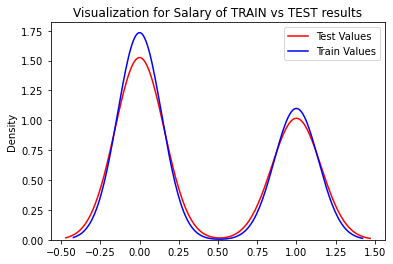

In [59]:
ax = sns.distplot(y_predict_test_7, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_7, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Salary of TRAIN vs TEST results')
plt.legend()
plt.show()

In [50]:
svm_classifier_8 = svm.SVC(kernel= 'rbf',C=1.0,degree=3,gamma='scale',class_weight='balanced')
svm_classifier_8.fit(X_train_3,y_train_3)

y_predict_train_8 = svm_classifier_8.predict(X_train_3)
y_predict_test_8 = svm_classifier_8.predict(X_test_3)

print('TRAIN MODEL - 8')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train_3,y_predict_train_8),4))
print('Train Precision Score :',round(precision_score(y_train_3,y_predict_train_8)))
print('Train Recall Score   :',round(recall_score(y_train_3,y_predict_train_8),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train_3,y_predict_train_8))

print('TEST MODEL - 8')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test_3,y_predict_test_8),4))
print('Test Precision Score :',round(precision_score(y_test_3,y_predict_test_8)))
print('Test Recall Score    :',round(recall_score(y_test_3,y_predict_test_8),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test_3,y_predict_test_8))

TRAIN MODEL - 8
------------------------------------------------------------------------
Train Accuracy Score : 0.816
Train Precision Score : 1
Train Recall Score   : 0.2768
Train Confusion Matrix :
 [[377  11]
 [ 81  31]]
TEST MODEL - 8
------------------------------------------------------------------------
Test Accuracy Score  : 0.8
Test Precision Score : 1
Test Recall Score    : 0.25
Test Confusion Matrix :
 [[223   9]
 [ 51  17]]


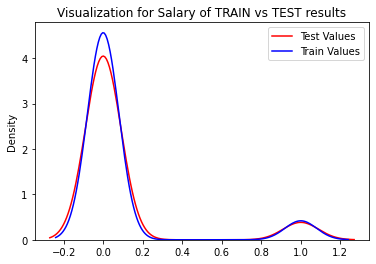

In [60]:
ax = sns.distplot(y_predict_test_8, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_8, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Salary of TRAIN vs TEST results')
plt.legend()
plt.show()

In [51]:
svm_classifier_9 = svm.SVC(kernel= 'poly',C=1.0,degree=3,gamma='scale',class_weight='balanced')
svm_classifier_9.fit(X_train_3,y_train_3)

y_predict_train_9 = svm_classifier_9.predict(X_train_3)
y_predict_test_9 = svm_classifier_9.predict(X_test_3)

print('TRAIN MODEL - 9')
print('------------------------------------------------------------------------')
print('Train Accuracy Score :',round(accuracy_score(y_train_3,y_predict_train_9),4))
print('Train Precision Score :',round(precision_score(y_train_3,y_predict_train_9)))
print('Train Recall Score   :',round(recall_score(y_train_3,y_predict_train_9),4))
print('Train Confusion Matrix :\n',confusion_matrix(y_train_3,y_predict_train_9))

print('TEST MODEL - 9')
print('------------------------------------------------------------------------')
print('Test Accuracy Score  :',round(accuracy_score(y_test_3,y_predict_test_9),4))
print('Test Precision Score :',round(precision_score(y_test_3,y_predict_test_9)))
print('Test Recall Score    :',round(recall_score(y_test_3,y_predict_test_9),4))
print('Test Confusion Matrix :\n',confusion_matrix(y_test_3,y_predict_test_9))

TRAIN MODEL - 9
------------------------------------------------------------------------
Train Accuracy Score : 0.788
Train Precision Score : 1
Train Recall Score   : 0.0625
Train Confusion Matrix :
 [[387   1]
 [105   7]]
TEST MODEL - 9
------------------------------------------------------------------------
Test Accuracy Score  : 0.7967
Test Precision Score : 1
Test Recall Score    : 0.1029
Test Confusion Matrix :
 [[232   0]
 [ 61   7]]


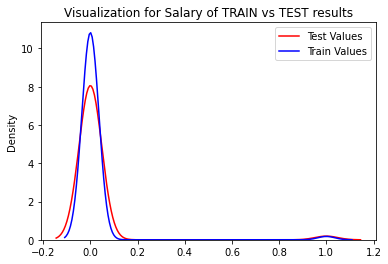

In [61]:
ax = sns.distplot(y_predict_test_9, hist=False, color="r", label="Test Values")
sns.distplot(y_predict_train_9, hist=False, color="b", label="Train Values",ax=ax)
plt.title('Visualization for Salary of TRAIN vs TEST results')
plt.legend()
plt.show()